In [154]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import pandas as pd
import os
import dtale
import numpy as np

In [176]:
project_dir = os.path.dirname(os.path.abspath(''))
df = pd.read_json(os.path.join(project_dir, 'model_prepped_dataset.json'))
dtale.show(df).open_browser()

KeyboardInterrupt: 

In [190]:
X = df.loc[:, df.columns != 'Outcome']
X = df[['Season', 'Capacity', 'Elo_home', 'Elo_away', 'Day',
        'Home_Team_Streak', 'Away_Team_Streak', 'Home_Team_Form', 'Away_Team_Form',
       'Home_Team_Goals', 'Away_Team_Goals']]
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [191]:
print(len(X_train))
print(len(X_test))
print(len(X))

83509
14738
98247


In [192]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [193]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [194]:
y_pred = lr.predict(X_test)
y_pred = np.rint(y_pred)
mse = mean_squared_error(y_test, y_pred)
y_delta = y_pred - y_test
accu = (1 - (np.count_nonzero(y_delta) / len(y_delta))) * 100
print(f'Accuracy: {accu}%.\nMSE: {mse}')

Accuracy: 27.690324331659653%.
MSE: 2.631157551906636


<AxesSubplot:>

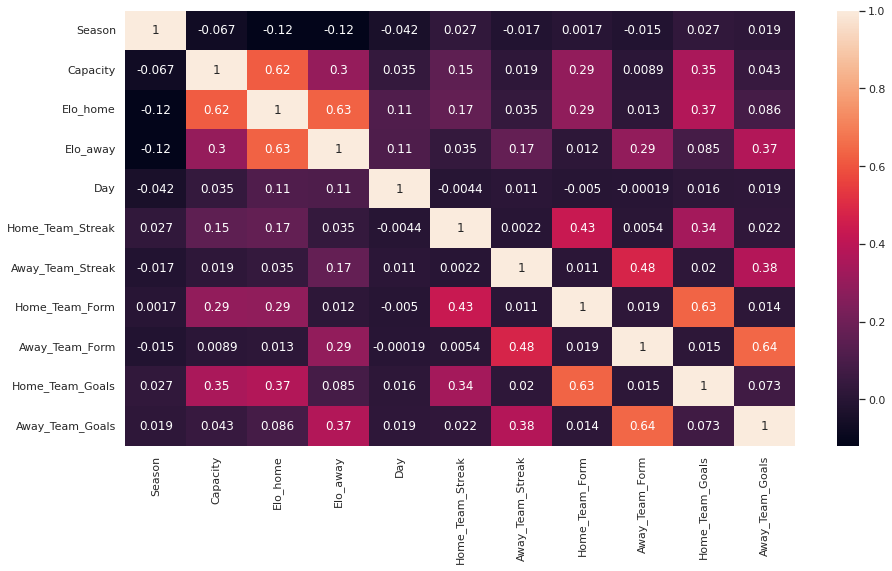

In [195]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(X.corr(), annot=True)